### Weather Multiclassification

In this notebook, we'll apply knowledges of DL to classify if the weather type is either sunny, cloudy, snowy and rainy. Sure, we don't need DL to classify that type of data, since it's posible to use catboost/xboost and others models to archive an accurate prediction of structured data. However, it's interesting to apply as practice. 

Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import scikeras
import sklearn
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')


Importing database

In [3]:
!pip install kagglehub

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/weather-type-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\caioe\.cache\kagglehub\datasets\nikhil7280\weather-type-classification\versions\1


In [5]:
files = os.listdir(path)
print("files:", files)

files: ['weather_classification_data.csv']


In [6]:


file_path = os.path.join(path, 'weather_classification_data.csv') 
df = pd.read_csv(file_path)


df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


All columns must be numeric, so, let's apply a pipeline and OneHotEncoder

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [8]:


ohe_columns = df.select_dtypes(include=['object']).columns
ohe_columns = ohe_columns.drop('Weather Type')
not_ohe_columns = df.drop(columns=ohe_columns).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ohe_columns)
    ], remainder='passthrough'  
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


df_transformed = pipeline.fit_transform(df)


encoded_columns = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(ohe_columns)


all_columns = list(encoded_columns) + list(not_ohe_columns)


df_encoded = pd.DataFrame(df_transformed, columns=all_columns)

df_encoded





,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,14.0,73,9.5,82.0,1010.82,2,3.5,Rainy
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,39.0,96,8.5,71.0,1011.43,7,10.0,Cloudy
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,30.0,64,7.0,16.0,1018.72,5,5.5,Sunny
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,38.0,83,1.5,82.0,1026.25,7,1.0,Sunny
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,27.0,74,17.0,66.0,990.67,1,2.5,Rainy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,74,14.5,71.0,1003.15,1,1.0,Rainy
13196,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,76,3.5,23.0,1067.23,1,6.0,Snowy
13197,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,77,5.5,28.0,1012.69,3,9.0,Cloudy
13198,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,76,10.0,94.0,984.27,0,2.0,Snowy


In [9]:
X = df_encoded.drop('Weather Type', axis = 1)
y = df_encoded['Weather Type']

In [10]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

# Applying label encoder on target
y = le.fit_transform(y)

print(y)


[1 0 3 ... 0 2 1]


In [11]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [12]:
y
# Now y is converted to a matrix

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [13]:
X = X.values

In [14]:
X = X.astype(float)
X

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.01082e+03,
        2.00000e+00, 3.50000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.01143e+03,
        7.00000e+00, 1.00000e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.01872e+03,
        5.00000e+00, 5.50000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.01269e+03,
        3.00000e+00, 9.00000e+00],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 9.84270e+02,
        0.00000e+00, 2.00000e+00],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.01537e+03,
        5.00000e+00, 1.00000e+01]])

In [15]:
y.shape

(13200, 4)

In [16]:
X.shape

(13200, 18)

Ok. We have two arrays right now.

Train-test

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (10560, 18) (10560, 4)
Test: (2640, 18) (2640, 4)


Structure of Neural Network

In [18]:
from tensorflow.keras.models import Sequential

In [19]:




neural_network1 = Sequential([
    # entry date
    tf.keras.layers.InputLayer(shape = (18,)),

    # hidden layer
    tf.keras.layers.Dense(units = 11, activation = 'relu'),
    
    
    
    tf.keras.layers.Dense(units = 11, activation = 'relu'),
    
    tf.keras.layers.Dense(units = 11, activation = 'relu'),
   

    tf.keras.layers.Dense(units = 11, activation = 'relu'),
    
    tf.keras.layers.Dense(units = 11, activation = 'relu'),
    

    

    # output layer
    tf.keras.layers.Dense(units = 4, activation = 'softmax')
])



In [20]:
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [21]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',    # Ou use 'val_accuracy' se preferir monitorar a acurácia
    factor=0.5,            # Reduzir a learning rate em 50%
    patience=5,            # Número de épocas sem melhora antes de reduzir a learning rate
    min_lr=0.0000001         # Limite inferior para a taxa de aprendizado
)

In [22]:
neural_network1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           209 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

As it's represented as vector, we will use categorical_crossentropy.

In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [24]:
neural_network1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'],)




In [25]:
history = neural_network1.fit(X_train, y_train, batch_size = 8, epochs = 200, validation_data=(X_test, y_test), 
                    callbacks=[lr_scheduler])

Epoch 1/200
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4228 - loss: 13.3552 - val_accuracy: 0.4936 - val_loss: 1.0267 - learning_rate: 0.0010
Epoch 2/200
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5407 - loss: 1.0138 - val_accuracy: 0.5591 - val_loss: 1.0171 - learning_rate: 0.0010
Epoch 3/200
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5896 - loss: 0.9610 - val_accuracy: 0.7246 - val_loss: 0.8538 - learning_rate: 0.0010
Epoch 4/200
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7060 - loss: 0.8495 - val_accuracy: 0.7663 - val_loss: 0.7317 - learning_rate: 0.0010
Epoch 5/200
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7389 - loss: 0.7673 - val_accuracy: 0.7758 - val_loss: 0.6609 - learning_rate: 0.0010
Epoch 6/200
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8252 - loss: 0.5774 - val_accuracy: 0.8473 - val_loss: 0.5187 - learning_rate: 0.0010
Epoch 7/200
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.

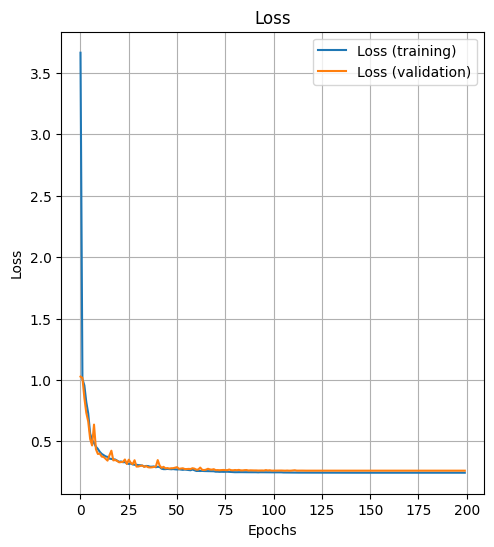

In [26]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (training)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()


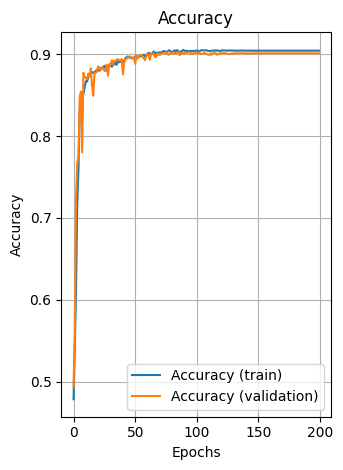

In [27]:

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation)')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Mostrar os gráficos
plt.tight_layout()
plt.show()


Analisis of prediction

In [28]:
neural_network1.evaluate(X_test, y_test)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.9026 - loss: 0.2540


[0.26040783524513245, 0.9011363387107849]

In [29]:
pred = neural_network1.predict(X_test)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [30]:
pred

array([[5.80783890e-05, 1.42249104e-04, 2.22509421e-04, 9.99577105e-01],
       [2.38316506e-02, 2.09729970e-02, 3.54358330e-02, 9.19759512e-01],
       [2.44900747e-03, 3.42171220e-03, 5.76076936e-03, 9.88368571e-01],
       ...,
       [3.23864151e-05, 1.41516275e-05, 9.99915123e-01, 3.82452708e-05],
       [9.32279945e-05, 4.10868561e-05, 9.99766052e-01, 9.96985691e-05],
       [9.90803838e-01, 1.94446906e-03, 3.70344403e-03, 3.54829920e-03]],
      dtype=float32)

Well, we can determine if probability is above 50%, it has a high probability of malign tumor.

In [31]:
pred

array([[5.80783890e-05, 1.42249104e-04, 2.22509421e-04, 9.99577105e-01],
       [2.38316506e-02, 2.09729970e-02, 3.54358330e-02, 9.19759512e-01],
       [2.44900747e-03, 3.42171220e-03, 5.76076936e-03, 9.88368571e-01],
       ...,
       [3.23864151e-05, 1.41516275e-05, 9.99915123e-01, 3.82452708e-05],
       [9.32279945e-05, 4.10868561e-05, 9.99766052e-01, 9.96985691e-05],
       [9.90803838e-01, 1.94446906e-03, 3.70344403e-03, 3.54829920e-03]],
      dtype=float32)

In [32]:
y_test2 = [np.argmax(x) for x in y_test]
print(y_test2)

[3, 3, 3, 2, 3, 2, 3, 1, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 3, 0, 0, 0, 1, 3, 2, 3, 0, 2, 0, 2, 3, 1, 2, 3, 1, 2, 2, 0, 1, 3, 0, 0, 2, 1, 2, 3, 3, 0, 1, 2, 3, 1, 2, 2, 2, 3, 0, 0, 0, 0, 3, 1, 3, 3, 2, 1, 1, 0, 1, 3, 2, 2, 1, 1, 2, 1, 2, 0, 1, 3, 0, 3, 0, 2, 1, 3, 2, 3, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 1, 0, 3, 3, 1, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 3, 1, 0, 3, 1, 0, 2, 3, 0, 1, 3, 0, 1, 3, 3, 2, 2, 0, 2, 1, 0, 3, 3, 1, 2, 1, 1, 1, 2, 2, 1, 3, 0, 2, 1, 2, 2, 0, 3, 3, 1, 0, 3, 0, 1, 3, 1, 2, 3, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 3, 1, 2, 0, 0, 1, 0, 3, 2, 0, 2, 1, 0, 3, 0, 2, 0, 1, 3, 0, 0, 3, 2, 0, 3, 1, 2, 0, 0, 1, 0, 3, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 3, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 3, 1, 3, 3, 3, 2, 3, 2, 0, 2, 3, 1, 0, 3, 3, 2, 1, 2, 3, 0, 1, 2, 3, 3, 2, 1, 0, 2, 3, 1, 2, 1, 3, 3, 3, 0, 0, 1, 2, 3, 3, 3, 0, 3, 2, 0, 3, 3, 3, 2, 0, 0, 3, 2, 0, 3, 0, 3, 0, 3, 0, 0, 2, 2, 2, 3, 0, 1, 3, 1, 2, 2, 1, 3, 2, 3, 1, 3, 3, 1, 3, 2, 3, 2, 0, 1, 2, 3, 1, 2, 0, 0, 1, 0, 1, 2, 2, 3, 

In [33]:
pred2 = [np.argmax(x) for x in pred]
print(pred2)

[3, 3, 3, 2, 0, 2, 3, 1, 1, 2, 2, 2, 2, 3, 3, 3, 1, 3, 3, 0, 1, 0, 1, 3, 2, 3, 0, 2, 0, 2, 3, 1, 2, 3, 1, 2, 2, 0, 1, 3, 0, 0, 2, 1, 2, 3, 0, 0, 1, 2, 3, 1, 2, 2, 2, 0, 0, 1, 0, 0, 3, 1, 3, 3, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 3, 0, 3, 0, 2, 1, 3, 2, 3, 0, 0, 2, 1, 2, 2, 1, 3, 2, 1, 1, 0, 3, 3, 1, 1, 1, 1, 0, 0, 0, 3, 2, 2, 1, 2, 3, 1, 3, 3, 1, 0, 2, 3, 0, 1, 3, 0, 1, 1, 3, 2, 2, 0, 2, 1, 1, 3, 3, 1, 2, 1, 1, 1, 2, 0, 1, 3, 0, 2, 1, 2, 2, 3, 3, 3, 1, 0, 3, 0, 1, 1, 1, 0, 0, 1, 2, 3, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 3, 1, 2, 3, 1, 1, 0, 3, 2, 0, 2, 1, 0, 3, 0, 2, 0, 1, 3, 0, 0, 3, 2, 0, 3, 1, 2, 0, 0, 1, 0, 3, 0, 2, 1, 2, 0, 3, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 3, 1, 3, 3, 3, 2, 3, 2, 0, 2, 3, 1, 0, 2, 3, 2, 1, 3, 0, 0, 1, 2, 3, 3, 2, 1, 3, 2, 3, 1, 2, 1, 3, 3, 3, 0, 0, 1, 2, 3, 3, 3, 0, 3, 2, 0, 3, 3, 3, 2, 0, 0, 3, 2, 0, 3, 0, 3, 1, 3, 0, 0, 2, 0, 2, 3, 0, 1, 3, 1, 2, 2, 1, 0, 2, 3, 1, 3, 3, 1, 3, 2, 3, 2, 0, 1, 3, 3, 1, 2, 0, 0, 1, 0, 1, 2, 2, 3, 

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

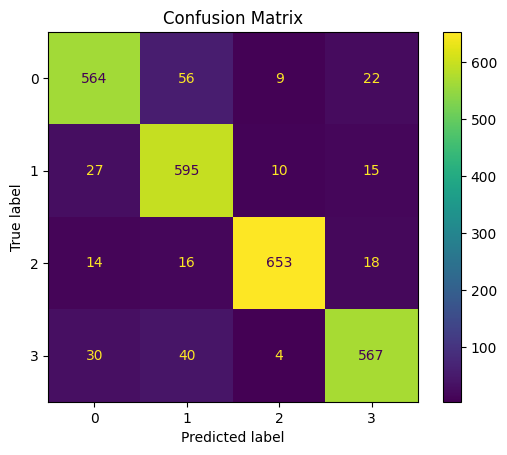

In [35]:
cm = confusion_matrix(y_test2, pred2 )

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.viridis)  #
plt.title('Confusion Matrix')
plt.show()

In [36]:
acu = accuracy_score(y_test2,pred2)

In [37]:
acu= round(acu, 4) * 100

In [38]:
acu

90.11

We could use crossvalidation and grid search to find out a best model from the database, but as it has been explained above, traditional machine learning methods would be more efficient to archive similar results. DL is better for non structural data. 